# Decision Tree Model for Breast Cancer Data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\nicol\\breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(axis=1, columns='id', inplace=True)#Remove any irrelevant columns from the dataframe
df.fillna(df.mean(), inplace = True)#Replace missing values using data imputation
df.dropna(inplace = True)#Delete missing rows

In [6]:
#making our response variable dichotomous
#1 = malignant, 2 = benign
from sklearn.preprocessing import LabelEncoder
df_clean = df.copy() 
labelencoder = LabelEncoder()
df_clean['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_clean) 
df_clean.loc[:,:] = scaled_values

In [8]:
#creating response and features df
response = pd.DataFrame(df_clean.diagnosis)
features = df_clean.iloc[:, 1:31]

In [10]:
#generating train and test data
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features, response, test_size=0.30, random_state=0)
features_train, features_test, response_train, response_test = my_result_list

In [12]:
#fitting decision tree model to our train data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(244.73152173913044, 203.85, 'concave points_worst <= 0.489\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(198.33260869565217, 176.67000000000002, 'area_worst <= 0.189\ngini = 0.147\nsamples = 263\nvalue = [242, 21]'),
 Text(149.20434782608697, 149.49, 'area_se <= 0.053\ngini = 0.077\nsamples = 250\nvalue = [240, 10]'),
 Text(94.61739130434783, 122.31, 'concave points_worst <= 0.467\ngini = 0.034\nsamples = 232\nvalue = [228, 4]'),
 Text(58.22608695652174, 95.13, 'smoothness_se <= 0.054\ngini = 0.018\nsamples = 226\nvalue = [224, 2]'),
 Text(29.11304347826087, 67.94999999999999, 'smoothness_se <= 0.053\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(14.556521739130435, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(43.66956521739131, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(87.33913043478262, 67.94999999999999, 'texture_worst <= 0.553\ngini = 0.009\nsamples = 219\nvalue = [218, 1]'),
 Text(72.78260869565217, 40.77000

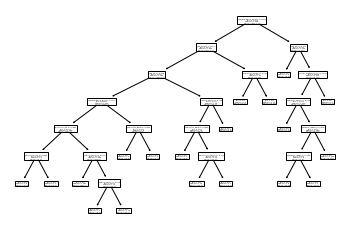

In [14]:
#creating decision tree
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names = features.columns.tolist())

In [15]:
#generating predictions and comparing to actuals
response_pred = classifier.predict(features_test)
print('Predictions ',response_pred)
print('Actuals ',list(response_test['diagnosis']))

Predictions  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0.]
Actuals  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 

In [16]:
#Assess accuracy
from sklearn.metrics import accuracy_score
print('Accuracy Score on test data: ', accuracy_score(y_true=response_test, y_pred=response_pred))

Accuracy Score on test data:  0.9122807017543859


In [17]:
#manually compute accuracy for comparison
predictions = pd.DataFrame(response_pred)
actuals = pd.DataFrame(response_test)
res = actuals.where(actuals.values==predictions.values).notna()
true_count = res.diagnosis[res.diagnosis==True].count()

In [18]:
Accuracy = true_count/len(response_pred)
Accuracy

0.9122807017543859

When using the following formula (number of correct predictions)/(number of total predictions) by obtaining correct and total prediction values, I found that the accuracy score I computed was the same as the one computed through sklearn. 

Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(response_test, response_pred)
print(cm)

[[97 11]
 [ 4 59]]


In [20]:
print('Number of negative predictions while it is actually negative: ',cm[0,0])
print('Number of positive predictions while it is actually negative: ',cm[0,1])
print('Number of negative predictions while it is actually positive: ',cm[1,0])
print('Number of positive predictions while it is actually positive: ',cm[1,1])

Number of negative predictions while it is actually negative:  97
Number of positive predictions while it is actually negative:  11
Number of negative predictions while it is actually positive:  4
Number of positive predictions while it is actually positive:  59


Feature Importance

In [21]:
importance = classifier.feature_importances_
feature_names = features.columns.to_list()

In [22]:
df_importance = pd.DataFrame(feature_names, columns = ['Feature Name'])
df_importance['Score'] = importance
df_importance.head(10)

,Feature Name,Score
0,radius_mean,0.000000
1,texture_mean,0.000000
2,perimeter_mean,0.000000
3,area_mean,0.000000
4,smoothness_mean,0.000000
5,compactness_mean,0.000000
6,concavity_mean,0.021125
7,concave points_mean,0.000000
8,symmetry_mean,0.018154
9,fractal_dimension_mean,0.000000


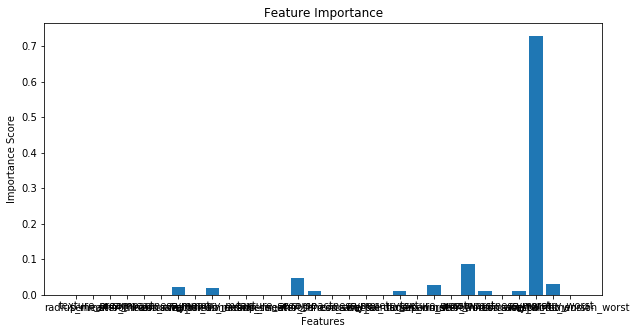

In [23]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))

pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()